In [5]:
import os

!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
openjdk-8-jdk-headless is already the newest version (8u362-ga-0ubuntu1~20.04.1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [15]:
import pandas as pd

# read data into a pandas dataframe
data = pd.read_csv('https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt', header=None, names=['x', 'y'])

In [28]:
import numpy as np

# initialize centroids
centroids = np.array([[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]])

In [30]:
def k_means(data, centroids, num_iterations):
    for i in range(num_iterations):
        # Assign each data point to the closest center
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        # Update the centers based on the assigned points
        for j in range(len(centroids)):
            centroids[j] = np.mean(data[labels == j], axis=0)

    return labels, centroids

In [31]:
# call k_means function
labels, fcentroids = k_means(data.values, centroids, 100)

# display final centroids
print('Final centroids:')
print(fcentroids)

Final centroids:
[[ 26  -1]
 [-30   2]
 [  0  -2]
 [ 11  -1]
 [-12   0]]


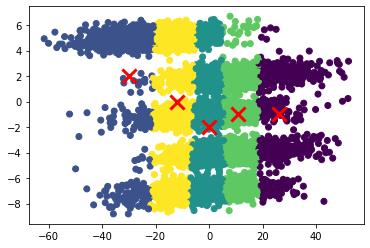

In [20]:
import matplotlib.pyplot as plt

plt.scatter(data.values[:, 0], data.values[:, 1], c=labels)
plt.scatter(fcentroids[:, 0], fcentroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.show()